In [1]:
# Using these wrappers, the example program can be written in any of these languages:
# https://physionet.org/physiotools/wpg/wpg_10.htm#SWIG-wrappers-for-Java_002c-Perl_002c-Python_002c-and-other-languages
# https://github.com/MIT-LCP/wfdb-python/blob/master/demo.ipynb

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

In [6]:
record = wfdb.rdrecord('sample-data/a103l') 
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\MI2RL-KHJ\\workspace_signal\\sample-data\\a103l.hea'

In [3]:
# C:\Users\MI2RL-KHJ\workspace_signal\physionet_raw\mit-bih-normal-sinus-rhythm-database-1.0.0

In [4]:
#root_path = os.getcwd() #'C:\\Users\\MI2RL-KHJ\\workspace_signal\\'
mit_db = 'physionet\\mit_normal\\physionet.org\\files\\nsrdb\\1.0.0'

In [5]:
# norm root_path
root_path = r'C:\Users\MI2RL-KHJ\workspace_signal\physionet_raw\mit-bih-normal-sinus-rhythm-database-1.0.0'

In [6]:
norm_ids = [file for file in os.listdir(root_path) if file.endswith('atr')]

In [7]:
norm_pt_ids = [ids.split('.atr')[0] for ids in norm_ids]
norm_pt_ids

['16265',
 '16272',
 '16273',
 '16420',
 '16483',
 '16539',
 '16773',
 '16786',
 '16795',
 '17052',
 '17453',
 '18177',
 '18184',
 '19088',
 '19090',
 '19093',
 '19140',
 '19830']

### Normal

#### 1) Overall processing

In [2]:
# GET ECGs Data and Rpeaks data
# -*- coding: utf-8 -*-
"""Script for formatting the MIT-Normal Sinus Rhythm Database

Steps:
    1. Download the ZIP database from https://physionet.org/content/nsrdb/1.0.0/
    2. Open it with a zip-opener (WinZip, 7zip).
    3. Extract the folder of the same name (named 'mit-bih-normal-sinus-rhythm-database-1.0.0') to the same folder as this script.
    4. Run this script.

Credits:
    https://github.com/berndporr/py-ecg-detectors/blob/master/tester_MITDB.py by Bernd Porr
"""
import pandas as pd
import numpy as np
import wfdb
import os

# data_files = ["mit-bih-normal-sinus-rhythm-database-1.0.0/" + file for file in
#               os.listdir("mit-bih-normal-sinus-rhythm-database-1.0.0") if ".dat" in file]

data_files = [ os.path.join(root_path, file) for file in
              os.listdir(root_path) if ".dat" in file]

dfs_ecg = []
dfs_rpeaks = []

for participant, file in enumerate(data_files):
    print("Participant: " + str(participant + 1) + "/" + str(len(data_files)))

    # Get signal
    data = pd.DataFrame({"ECG": wfdb.rdsamp(file[:-4])[0][:, 1]})
    data["Participant"] = "MIT-Normal_%.2i" % (participant)
    data["Sample"] = range(len(data))
    data["Sampling_Rate"] = 128
    data["Database"] = "MIT-Normal"

    # getting annotations
    anno = wfdb.rdann(file[:-4], 'atr')
    anno = anno.sample[np.where(np.array(anno.symbol) == "N")[0]]
    anno = pd.DataFrame({"Rpeaks": anno})
    anno["Participant"] = "MIT-Normal_%.2i" % (participant)
    anno["Sampling_Rate"] = 128
    anno["Database"] = "MIT-Normal"

    # Select only 1h of recording (otherwise it's too big)
    data = data[460800:460800 * 2].reset_index(drop=True)
    anno = anno[(anno["Rpeaks"] > 460800) & (anno["Rpeaks"] <= 460800 * 2)].reset_index(drop=True)
    anno["Rpeaks"] = anno["Rpeaks"] - 460800

    # Store with the rest
    dfs_ecg.append(data)
    dfs_rpeaks.append(anno)

# Save
saved_path = os.getcwd()
print(saved_path)
df_ecg = pd.concat(dfs_ecg).to_csv("ECGs.csv", index=False)
dfs_rpeaks = pd.concat(dfs_rpeaks).to_csv("Rpeaks.csv", index=False)



# Quick test
# import neurokit2 as nk
# nk.events_plot(anno["Rpeaks"][anno["Rpeaks"] <= 1000], data["ECG"][0:1001])


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
print_hi('PyCharm')

# norm_path = 'C:\Users\MI2RL - KHJ\workspace_signal\physionet_raw\mit - bih - normal - sinus - rhythm - database - 1.0.0'
# norm_files = [file for file in os.listdir(root_path) if file.endswith('atr')]
# norm_ids = [ids.split('.atr')[0] for ids in norm_files]

# for pt_id in norm_ids:
#     rpeak(pt_id)

# norm root_path
root_path = r'C:\Users\MI2RL-KHJ\workspace_signal\physionet_raw\mit-bih-normal-sinus-rhythm-database-1.0.0'
processing(root_path)

# See PyCharm help at https://www.jetbrains.com/help/pycharm/

IndentationError: expected an indented block (<ipython-input-2-4854d15a3426>, line 70)

In [51]:
# norm_pt_ids 

#### 2. Each processing to check

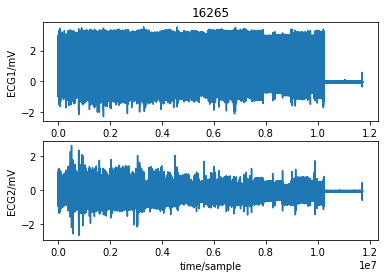

{'record_name': '16265',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 11730944,
 'base_time': datetime.time(8, 4),
 'base_date': None,
 'comments': ['32 M'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.165, -0.325],
        [-0.155, -0.325],
        [-0.195, -0.305],
        ...,
        [-0.05 , -0.095],
        [-0.05 , -0.085],
        [-0.05 , -0.085]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['16265.dat', '16265.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-33, -65],
 'checksum': [15756, -21174],
 'block_size': [0, 0]}

In [11]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.

%matplotlib inline
record = wfdb.rdrecord(os.path.join(root_path, norm_pt_ids[0]))
wfdb.plot_wfdb(record=record, title=norm_pt_ids[0])#'Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

In [13]:
import pandas as pd 

df = pd.DataFrame(record.p_signal, columns=['ECG1', 'ECG2'])

In [108]:
wfdb.rdsamp(file[:-4])[1][:, 1]

NameError: name 'file' is not defined

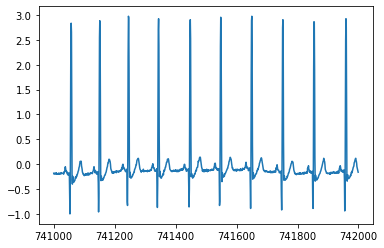

In [14]:
%matplotlib inline
plt.plot(df['ECG1'][741000:742000])

In [110]:
new_workplace_path = r'C:/Users/MI2RL-KHJ/workspace_signal/20211109/'

In [111]:
overall_ecg = os.path.join(new_workplace_path, 'ECGs_1110.csv')
ecg_df = pd.read_csv(overall_ecg)

In [112]:
ids = ecg_df['Participant'].unique()

In [113]:
ids

array(['MIT-Normal_00', 'MIT-Normal_01', 'MIT-Normal_02', 'MIT-Normal_03',
       'MIT-Normal_04', 'MIT-Normal_05', 'MIT-Normal_06', 'MIT-Normal_07',
       'MIT-Normal_08', 'MIT-Normal_09', 'MIT-Normal_10', 'MIT-Normal_11',
       'MIT-Normal_12', 'MIT-Normal_13', 'MIT-Normal_14', 'MIT-Normal_15',
       'MIT-Normal_16', 'MIT-Normal_17'], dtype=object)

In [115]:
ecg1_over_df = [ecg_df[ecg_df['Participant']==i]['ECG1'] for i in ids]
ecg2_over_df = [ecg_df[ecg_df['Participant']==i]['ECG2'] for i in ids]

In [116]:
signal = over_df[0]

In [117]:
ecg1_folder = os.path.join(new_workplace_path, 'ecg1')

In [22]:
import numpy as np
from biosppy.signals import ecg

In [118]:
norm_files = [i for i in os.listdir(ecg1_folder) if i.endswith('json')]
norm_ids = [i.split('.json')[0] for i in norm_files]

In [119]:
import json

In [117]:
# filtered
# with open('norm_01.json', 'r') as f:
#     tmp_norm = json.load(f)

# print(tmp_norm.keys())

# yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
# xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]

# %matplotlib auto
# plt.plot(tmp_norm['filtered'])
# plt.plot(tmp_norm['rpeaks'], yvals, "r+")

Using matplotlib backend: Qt5Agg


In [120]:
norm_files

['MIT-Normal_00.json',
 'MIT-Normal_01.json',
 'MIT-Normal_02.json',
 'MIT-Normal_03.json',
 'MIT-Normal_04.json',
 'MIT-Normal_05.json',
 'MIT-Normal_06.json',
 'MIT-Normal_07.json',
 'MIT-Normal_08.json',
 'MIT-Normal_09.json',
 'MIT-Normal_10.json',
 'MIT-Normal_11.json',
 'MIT-Normal_12.json',
 'MIT-Normal_13.json',
 'MIT-Normal_14.json',
 'MIT-Normal_15.json',
 'MIT-Normal_16.json',
 'MIT-Normal_17.json']

In [122]:
with open(norm_files[0], 'r') as f:
    tmp_norm = json.load(f)

print(tmp_norm.keys())

yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.title(norm_files[0])

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_00.json')

In [128]:
# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(norm_files[0])

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_00.json')

In [123]:
%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_corrected_rpeak, yvals_range, "g+")
plt.title(norm_files[0])

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_00.json')

In [76]:
%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.title(norm_files[0])

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_00.json')

In [124]:
# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

In [125]:
%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_corrected_rpeak, yvals_range, "g+")
plt.title(norm_files[0])

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_00.json')

##### subject 01

In [73]:
with open(norm_files[1], 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])


In [74]:
%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(norm_files[1])

Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_01.json')

##### subject 02

In [83]:
subject = norm_files[2]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_02.json')

##### subject 03 ;need to check ecg data

In [84]:
subject = norm_files[3]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_03.json')

In [ ]:
##### subject 04 ;need to check ecg data

In [85]:
subject = norm_files[4]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_04.json')

##### subject 05

In [72]:
subject = norm_files[5]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_05.json')

In [ ]:
##### subject 06

In [86]:
subject = norm_files[6]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_06.json')

In [87]:
subject = norm_files[7]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_07.json')

In [88]:
subject = norm_files[8]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_08.json')

In [89]:
subject = norm_files[9]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_09.json')

In [90]:
subject = norm_files[10]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_10.json')

In [91]:
subject = norm_files[11]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_11.json')

In [93]:
subject = norm_files[12]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_12.json')

In [95]:
subject = norm_files[13]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_13.json')

In [96]:
subject = norm_files[14]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_14.json')

In [97]:
subject = norm_files[15]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_15.json')

In [98]:
subject = norm_files[16]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_16.json')

In [99]:
subject = norm_files[17]

with open(subject, 'r') as f:
    tmp_norm = json.load(f)
print(tmp_norm.keys())

# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [tmp_norm['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

dict_keys(['ts', 'filtered', 'rpeaks', 'ts_tmpl', 'templates', 'ts_hr', 'hr'])
Using matplotlib backend: Qt5Agg


Text(0.5, 1.0, 'MIT-Normal_17.json')

In [100]:
# norm root_path
root_path = r'C:\Users\MI2RL-KHJ\workspace_signal\physionet_raw\mit-bih-normal-sinus-rhythm-database-1.0.0'
saved_path = r'C:\Users\MI2RL-KHJ\workspace_signal\20211109'

#processing(root_path)
overall_ecg = os.path.join(saved_path, 'ECGs.csv')
ecg_df = pd.read_csv(overall_ecg)
ids = ecg_df['Participant'].unique()

In [101]:
ids

array(['MIT-Normal_00', 'MIT-Normal_01', 'MIT-Normal_02', 'MIT-Normal_03',
       'MIT-Normal_04', 'MIT-Normal_05', 'MIT-Normal_06', 'MIT-Normal_07',
       'MIT-Normal_08', 'MIT-Normal_09', 'MIT-Normal_10', 'MIT-Normal_11',
       'MIT-Normal_12', 'MIT-Normal_13', 'MIT-Normal_14', 'MIT-Normal_15',
       'MIT-Normal_16', 'MIT-Normal_17'], dtype=object)

In [136]:
for i in range(len(ids)):
    with open(os.path.join(ecg1_folder,norm_files[i]), 'r') as f:
        tmp_norm = json.load(f)
        print(norm_files[i], ':', len(tmp_norm['filtered']))

MIT-Normal_00.json : 11730944
MIT-Normal_01.json : 11520000
MIT-Normal_02.json : 11354112
MIT-Normal_03.json : 11051008
MIT-Normal_04.json : 11960320
MIT-Normal_05.json : 11327488
MIT-Normal_06.json : 11046912
MIT-Normal_07.json : 11284480
MIT-Normal_08.json : 10866688
MIT-Normal_09.json : 10659840
MIT-Normal_10.json : 11235328
MIT-Normal_11.json : 11960320
MIT-Normal_12.json : 10942464
MIT-Normal_13.json : 10967040
MIT-Normal_14.json : 11143168
MIT-Normal_15.json : 10705920
MIT-Normal_16.json : 11139072
MIT-Normal_17.json : 10701824


In [137]:
for i in range(len(ids)):
    with open(os.path.join(ecg1_folder,norm_files[i]), 'r') as f:
        tmp_norm = json.load(f)
        print(norm_files[i], ':', len(tmp_norm['rpeaks']))

MIT-Normal_00.json : 100483
MIT-Normal_01.json : 92150
MIT-Normal_02.json : 89841
MIT-Normal_03.json : 102097
MIT-Normal_04.json : 104340
MIT-Normal_05.json : 108289
MIT-Normal_06.json : 81987
MIT-Normal_07.json : 101630
MIT-Normal_08.json : 86894
MIT-Normal_09.json : 87561
MIT-Normal_10.json : 100676
MIT-Normal_11.json : 116207
MIT-Normal_12.json : 102530
MIT-Normal_13.json : 99652
MIT-Normal_14.json : 81608
MIT-Normal_15.json : 29767
MIT-Normal_16.json : 96813
MIT-Normal_17.json : 110364


In [148]:
x = np.array(tmp_norm['filtered']).reshape(-1,1)

In [149]:
x

array([[-0.165],
       [-0.155],
       [-0.195],
       ...,
       [-0.05 ],
       [-0.05 ],
       [-0.05 ]])

In [154]:
y_scaled = min_max_scaler.fit_transform(x)

In [153]:
x[3]

array([-0.205])

In [ ]:
# find max value as y-vals between -+ 10 points 
# corrected r-peaks 
# y-values 
yvals = [y_scaled['filtered'][i] for i in tmp_norm['rpeaks']]
yvals_argmax_range = [np.argmax(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]
yvals_rpeaks = [np.max(tmp_norm['filtered'][i-10:i+10]) for i in tmp_norm['rpeaks']]

# x-values 
xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

%matplotlib auto
plt.plot(tmp_norm['filtered'])
plt.plot(tmp_norm['rpeaks'], yvals, "rx")
plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
plt.title(subject)

In [163]:
## Normalization: Min-Max

#from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

#normalized_df = {}
for i in range(3,18):
    with open(os.path.join(ecg1_folder,norm_files[i]), 'r') as f:
        tmp_norm = json.load(f)
   
    print('Processing>>>>', ids[i])
    subject = ids[i]
    # Min-max Normalization
    y = np.array(tmp_norm['filtered']).reshape(-1,1)
    y_scaled = min_max_scaler.fit_transform(y)
    normalized_df[ids[i]] = y_scaled
    
    # find max value as y-vals between -+ 10 points
    # y-values 
    # corrected r-peaks 
    yvals = [y_scaled[i] for i in tmp_norm['rpeaks']]
    yvals_argmax_range = [np.argmax(y_scaled[i-10:i+10]) for i in tmp_norm['rpeaks']]
    yvals_rpeaks = [np.max(y_scaled[i-10:i+10]) for i in tmp_norm['rpeaks']]

    # x-values 
    xvals = [tmp_norm['ts'][i] for i in tmp_norm['rpeaks']]
    xvals_range = [list(range(i-10, i+11)) for i in tmp_norm['rpeaks']]
    xvals_rpeaks = [xvals_range[i][yvals_argmax_range[i]] for i in range(len(xvals_range))]

    # plotting
    # %matplotlib auto
    plt.figure()
    plt.plot(y_scaled)
    plt.plot(tmp_norm['rpeaks'], yvals, "rx")
    plt.plot(xvals_rpeaks, yvals_rpeaks, "g+")
    plt.title(subject)
    plt.show()

MemoryError: 

In [159]:
normalized_df

{'MIT-Normal_00': array([[0.36734694],
        [0.36904762],
        [0.3622449 ],
        ...,
        [0.38690476],
        [0.38690476],
        [0.38690476]])}

In [153]:
def flatten(t):
    return [item for sublist in t for item in sublist]

flat_tmp = flatten(tmp_norm['templates'])

In [13]:
# atr_list =[file for file in os.listdir(mit_db) if file.endswith('.atr')]
# len(atr_list) #18

In [73]:
plt.plot(df['ECG2'][:5000], label='ECG2', color='#ff7f0e')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [74]:
plt.plot(df['(-1)*ECG2'][:5000], label='(-1)*ECG2', color='#ff7f0e')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [82]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord(os.path.join(normal_path,'16265'))
wfdb.plot_wfdb(record=record, title='Record 16265')#'Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

{'record_name': '16265',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 11730944,
 'base_time': datetime.time(8, 4),
 'base_date': None,
 'comments': ['32 M'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.165, -0.325],
        [-0.155, -0.325],
        [-0.195, -0.305],
        ...,
        [-0.05 , -0.095],
        [-0.05 , -0.085],
        [-0.05 , -0.085]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['16265.dat', '16265.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-33, -65],
 'checksum': [15756, -21174],
 'block_size': [0, 0]}

In [86]:
import pandas as pd 

df = pd.DataFrame(record.p_signal, columns=['ECG1', 'ECG2'])

In [89]:
df['(-1)*ECG2'] = (df['ECG2']*-1)

In [90]:
df

,ECG1,ECG2,(-1)*ECG2
0,-0.165,-0.325,0.325
1,-0.155,-0.325,0.325
2,-0.195,-0.305,0.305
3,-0.205,-0.305,0.305
4,-0.185,-0.295,0.295
...,...,...,...
11730939,-0.050,-0.095,0.095
11730940,-0.050,-0.085,0.085
11730941,-0.050,-0.095,0.095
11730942,-0.050,-0.085,0.085


In [91]:
plt.plot(df['ECG1'][:5000], label='ECG1')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [92]:
plt.plot(df['ECG2'][:5000], label='ECG2', color='#ff7f0e')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [95]:
plt.plot(df['(-1)*ECG2'][:5000], label='(-1)*ECG2', color='#ff7f0e')
plt.ylabel('ECG output Voltage (mV)')
plt.xlabel('Time(s)')
plt.legend()

In [100]:
tmp = df['ECG1'].values

In [101]:
tmp

array([-0.165, -0.155, -0.195, ..., -0.05 , -0.05 , -0.05 ])

In [103]:
np.save(os.path.join(normal_path, 'tmp.npy'), tmp)

In [104]:
os.path.join(normal_path, 'tmp.npy')

'C:\\Users\\MI2RL-KHJ\\workspace_signal\\physionet_raw\\mit-bih-normal-sinus-rhythm-database-1.0.0\\tmp.npy'

In [105]:
np.load(os.path.join(normal_path, 'tmp.npy'))

array([-0.165, -0.155, -0.195, ..., -0.05 , -0.05 , -0.05 ])

In [4]:
def main(argv):
    siarray = wfdb.isigopen("100s")
    if siarray.nsig < 2: sys.exit(1)
    v = wfdb.WFDB_SampleArray(2)
    for i in range(0,10):
        if wfdb.getvec(v.cast()) < 0: sys.exit(2)
        print ("\t{}\t{}".format(v[0], v[1]))

if __name__ == "__main__":
    main(sys.argv[1:])

AttributeError: module 'wfdb' has no attribute 'isigopen'

### Arrhythmia Dataset

In [9]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord(os.path.join(root_path, mit_db,'100'))
wfdb.plot_wfdb(record=record, title='Record 100')#'Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\MI2RL-KHJ\\workspace_signal\\physionet\\mit_normal\\physionet.org\\files\\nsrdb\\1.0.0\\100.hea'